# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# set up csv file for successful write
output_file = os.path.join('', 'WeatherPy', 'output_data','cities.csv')

### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats = np.random.uniform(lat_range[0], lat_range[1], size=50)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=50)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city + "&appid=" +  weather_api_key + "&units='metric'"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | binzhou
Processing Record 2 of Set 1 | takoradi
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | sheridan
Processing Record 6 of Set 1 | uige
Processing Record 7 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | palm coast
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | palmer
Processing Record 13 of Set 1 | avera
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | ketchikan
Processing Record 18 of Set 1 | sao francisco
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Se

Processing Record 32 of Set 4 | yako
Processing Record 33 of Set 4 | antalaha
Processing Record 34 of Set 4 | kodiak
Processing Record 35 of Set 4 | lorengau
Processing Record 36 of Set 4 | boa vista
Processing Record 37 of Set 4 | kroya
Processing Record 38 of Set 4 | caldas novas
Processing Record 39 of Set 4 | kargil
Processing Record 40 of Set 4 | corinto
Processing Record 41 of Set 4 | karratha
Processing Record 42 of Set 4 | padang
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | sao filipe
Processing Record 45 of Set 4 | tapanatepec
City not found. Skipping...
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | vostok
Processing Record 48 of Set 4 | anloga
Processing Record 49 of Set 4 | ferme-neuve
Processing Record 0 of Set 5 | ossora
Processing Record 1 of Set 5 | erenhot
Processing Record 2 of Set 5 | carberry
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | marsh harbour
Processing Record 5 of Set 5 | kegayli
Ci

Processing Record 26 of Set 8 | didwana
Processing Record 27 of Set 8 | kodinsk
Processing Record 28 of Set 8 | iwanai
Processing Record 29 of Set 8 | misratah
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | santa fe
Processing Record 32 of Set 8 | soyo
Processing Record 33 of Set 8 | upata
Processing Record 34 of Set 8 | basavana bagevadi
Processing Record 35 of Set 8 | athabasca
Processing Record 36 of Set 8 | kenai
Processing Record 37 of Set 8 | chokurdakh
Processing Record 38 of Set 8 | stoyba
City not found. Skipping...
Processing Record 39 of Set 8 | talavera
Processing Record 40 of Set 8 | joensuu
Processing Record 41 of Set 8 | nanortalik
Processing Record 42 of Set 8 | kushima
Processing Record 43 of Set 8 | christchurch
Processing Record 44 of Set 8 | hamilton
Processing Record 45 of Set 8 | san quintin
Processing Record 46 of Set 8 | payo
Processing Record 47 of Set 8 | praia da vitoria
Processing Record 48 of Set 8 | caravelas
Processing Record 49 of 

Processing Record 14 of Set 12 | bargal
City not found. Skipping...
Processing Record 15 of Set 12 | inderborskiy
City not found. Skipping...
Processing Record 16 of Set 12 | walvis bay
Processing Record 17 of Set 12 | bagotville
Processing Record 18 of Set 12 | pervomayskoye
Processing Record 19 of Set 12 | port hardy
Processing Record 20 of Set 12 | porto walter
Processing Record 21 of Set 12 | parainen
Processing Record 22 of Set 12 | chokwe
Processing Record 23 of Set 12 | outlook
Processing Record 24 of Set 12 | champerico
Processing Record 25 of Set 12 | camopi
Processing Record 26 of Set 12 | yakeshi
Processing Record 27 of Set 12 | leh
Processing Record 28 of Set 12 | izumo
Processing Record 29 of Set 12 | naze
Processing Record 30 of Set 12 | bahia blanca
Processing Record 31 of Set 12 | atasu
Processing Record 32 of Set 12 | alta floresta
Processing Record 33 of Set 12 | davydovo
Processing Record 34 of Set 12 | kontagora
Processing Record 35 of Set 12 | stokmarknes
Processin

In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,binzhou,37.3667,118.0167,274.94,36,0,2.58,CN,1675530928
1,takoradi,4.8845,-1.7554,301.50,75,82,5.22,GH,1675530929
2,rikitea,-23.1203,-134.9692,298.73,78,4,8.26,PF,1675530929
3,ushuaia,-54.8000,-68.3000,284.94,51,99,2.41,AR,1675530929
4,sheridan,44.8333,-106.9173,279.36,39,0,2.06,US,1675530930


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,binzhou,37.3667,118.0167,274.94,36,0,2.58,CN,1675530928
1,takoradi,4.8845,-1.7554,301.50,75,82,5.22,GH,1675530929
2,rikitea,-23.1203,-134.9692,298.73,78,4,8.26,PF,1675530929
3,ushuaia,-54.8000,-68.3000,284.94,51,99,2.41,AR,1675530929
4,sheridan,44.8333,-106.9173,279.36,39,0,2.06,US,1675530930


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

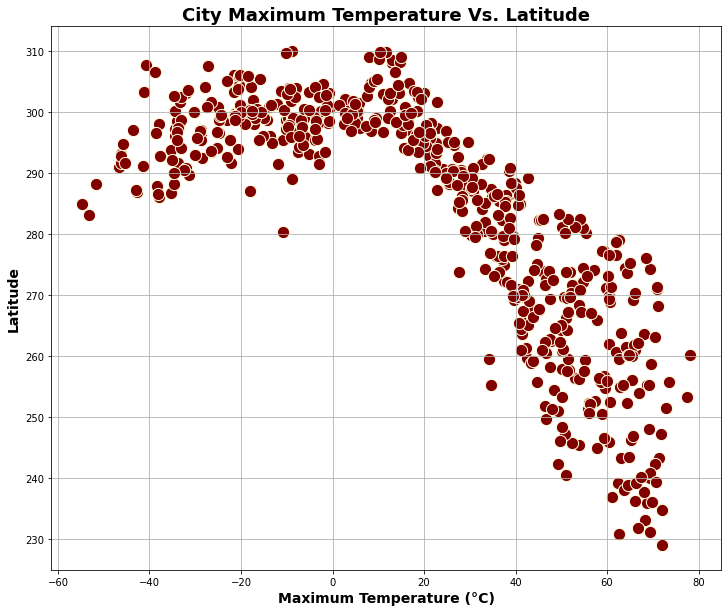

In [65]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
fig1 = city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', legend=False, marker='o', figsize=(12,10), s= 150, edgecolor='LightYellow', c='Maroon')

# Incorporate the other graph properties
# YOUR CODE HERE
fig1.set_title('City Maximum Temperature Vs. Latitude', fontsize=18, weight='bold')
fig1.set_xlabel('Maximum Temperature (°C)', fontsize=14, weight='bold')
fig1.set_ylabel('Latitude', fontsize=14, weight='bold')
fig1.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

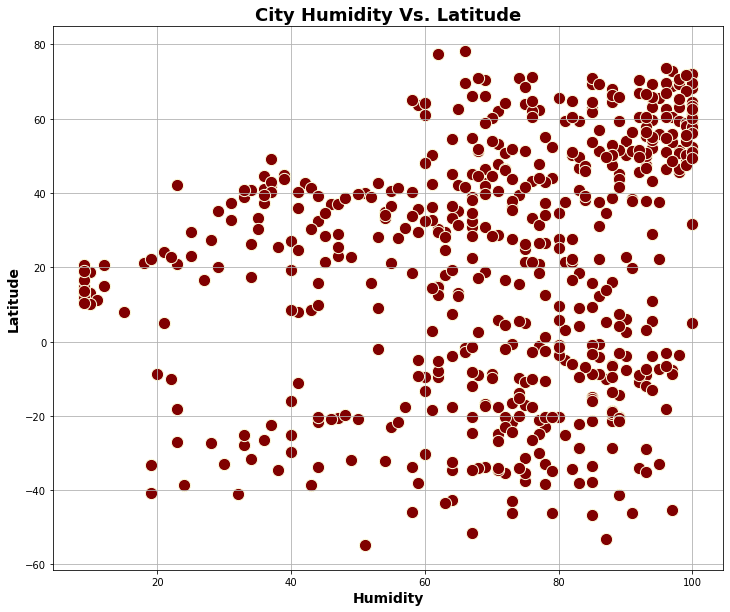

In [64]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
fig2 = city_data_df.plot(kind='scatter', x='Humidity', y='Lat', legend=False, marker='o', figsize=(12,10), s= 150, edgecolor='LightYellow', c='Maroon')

# Incorporate the other graph properties
# YOUR CODE HERE
fig2.set_title('City Humidity Vs. Latitude', fontsize=18, weight='bold')
fig2.set_xlabel('Humidity', fontsize=14, weight='bold')
fig2.set_ylabel('Latitude', fontsize=14, weight='bold')
fig2.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

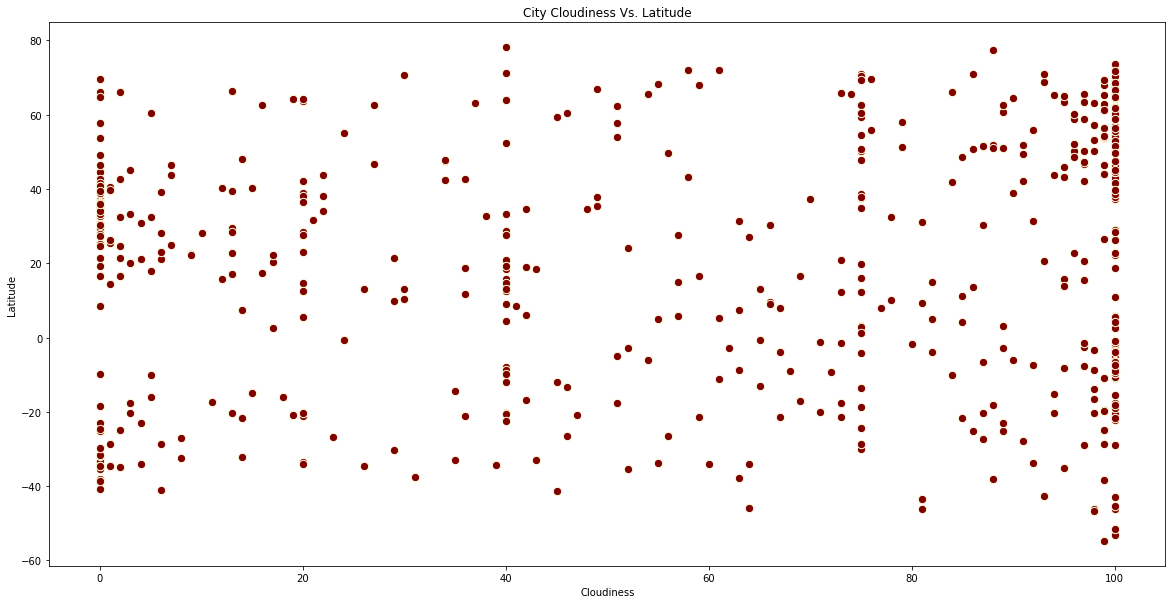

In [53]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
fig3 = city_data_df.plot(kind='scatter', x='Cloudiness', y='Lat', legend=False, marker='o', figsize=(12,10), s= 150, edgecolor='LightYellow', c='Maroon')

# Incorporate the other graph properties
# YOUR CODE HERE
fig3.set_title('City Cloudiness Vs. Latitude', fontsize=18, weight='bold')
fig3.set_xlabel('Cloudiness', fontsize=14, weight='bold')
fig3.set_ylabel('Latitude', fontsize=14, weight='bold')
fig3.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

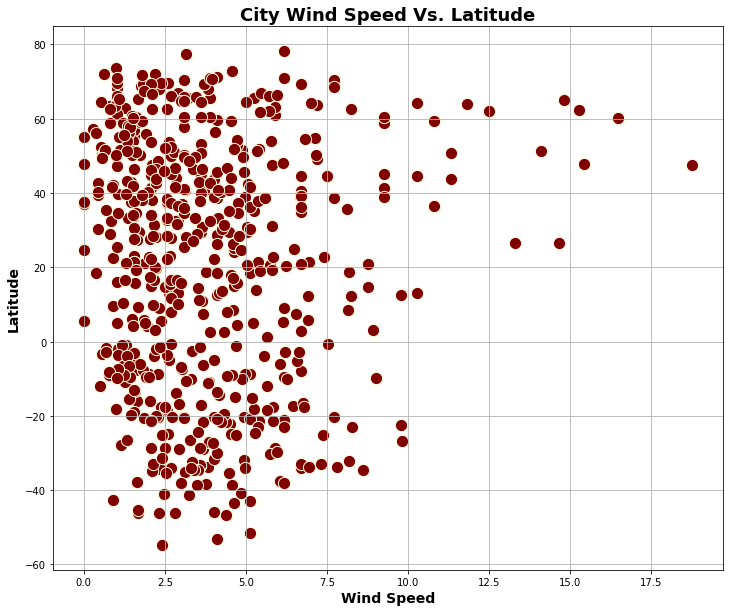

In [66]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
fig4 = city_data_df.plot(kind='scatter', x='Wind Speed', y='Lat', legend=False, marker='o', figsize=(12,10), s= 150, edgecolor='LightYellow', c='Maroon')
# Incorporate the other graph properties
# YOUR CODE HERE
fig4.set_title('City Wind Speed Vs. Latitude', fontsize=18, weight='bold')
fig4.set_xlabel('Wind Speed', fontsize=14, weight='bold')
fig4.set_ylabel('Latitude', fontsize=14, weight='bold')
fig4.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_plots 
(slope, intercept, rvalue, pvalue, stderr) = stats.lineregress(x_values, y_values)

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE